<a href="https://colab.research.google.com/github/yashwanth123/Covid-19_detection_using_deeplearning/blob/main/Covid_19_Pneumonia_Classifer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 39.33 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [ ]:
import os
base_dir = '/content/datasets/Data'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
train_covid_dir = os.path.join(train_dir, 'COVID19')
train_normal_dir = os.path.join(train_dir, 'NORMAL')
test_covid_dir = os.path.join(test_dir, 'COVID19')
test_normal_dir = os.path.join(test_dir, 'NORMAL')

In [ ]:
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(train_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(train_normal_names[:10])

print(len(train_covid_names), len(train_normal_names), len(test_covid_names), len(test_normal_names))

['COVID19(73).jpg', 'COVID19(353).jpg', 'COVID19(75).jpg', 'COVID19(369).jpg', 'COVID19(435).jpg', 'COVID-19 (331).jpg', 'COVID19(102).jpg', 'COVID19(348).jpg', 'COVID19(272).jpg', 'COVID19(48).jpg']
['NORMAL(1112).jpg', 'NORMAL(1450).jpg', 'NORMAL(299).jpg', 'NORMAL(60).jpg', 'NORMAL(990).jpg', 'NORMAL(1454).jpg', 'NORMAL(582).jpg', 'NORMAL(829).jpg', 'NORMAL(1437).jpg', 'NORMAL(1).jpg']
['COVID19(73).jpg', 'COVID19(353).jpg', 'COVID19(75).jpg', 'COVID19(369).jpg', 'COVID19(435).jpg', 'COVID-19 (331).jpg', 'COVID19(102).jpg', 'COVID19(348).jpg', 'COVID19(272).jpg', 'COVID19(48).jpg']
['NORMAL(1112).jpg', 'NORMAL(1450).jpg', 'NORMAL(299).jpg', 'NORMAL(60).jpg', 'NORMAL(990).jpg', 'NORMAL(1454).jpg', 'NORMAL(582).jpg', 'NORMAL(829).jpg', 'NORMAL(1437).jpg', 'NORMAL(1).jpg']
545 1266 167 317


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
  print("train datset covid images :", len(train_covid_names))
print("train datset normal images :", len(train_normal_names))
print("test datset covid images :", len(test_covid_names))
print("test datset normal images :", len(test_normal_names))
print("Total train images :", len(train_covid_names + train_normal_names))
print("Total test images :", len(test_covid_names + test_normal_names))

train datset covid images : 545
train datset normal images : 1266
test datset covid images : 167
test datset normal images : 317
Total train images : 1811
Total test images : 484


['/content/datasets/Data/train/COVID19/COVID19(535).jpg', '/content/datasets/Data/train/COVID19/COVID19(333).jpg', '/content/datasets/Data/train/COVID19/COVID19(306).jpg', '/content/datasets/Data/train/COVID19/COVID19(9).jpg', '/content/datasets/Data/train/COVID19/COVID19(33).jpg', '/content/datasets/Data/train/COVID19/COVID19(19).jpg', '/content/datasets/Data/train/COVID19/COVID19(83).jpg', '/content/datasets/Data/train/COVID19/COVID19(486).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(402).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(432).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(316).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1369).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(5).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1137).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(276).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1140).jpg']


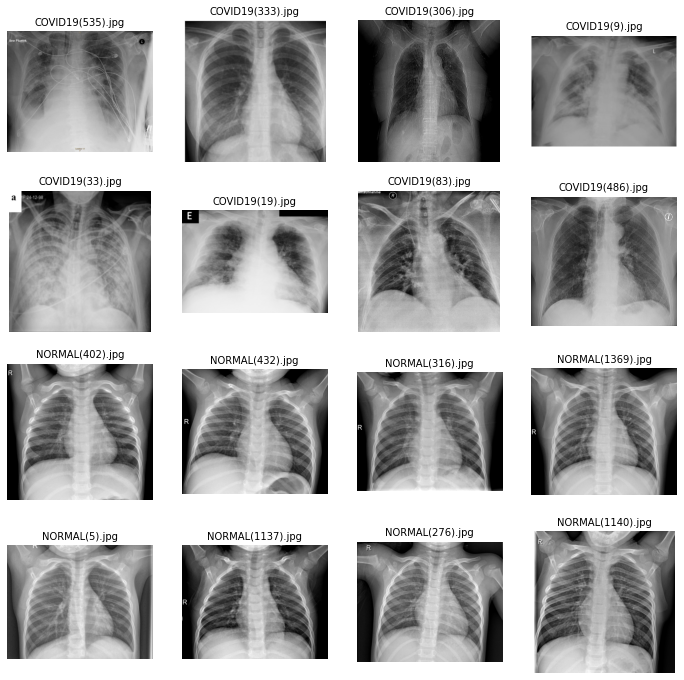

In [ ]:
import matplotlib.image as mpimg

nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(12,12)

next_covid_pic = [os.path.join(train_covid_dir, fname)for fname in train_covid_names[0:8]]
next_normal_pic = [os.path.join(train_normal_dir, fname)for fname in train_normal_names[0:8]]

print(next_covid_pic)
print(next_normal_pic)

for i , img_path in enumerate(next_covid_pic + next_normal_pic) : 
  data = img_path.split('/', 6)[6]
  sp = plt.subplot(nrows, ncols,i+1)
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(data, fontsize = 10)
  plt.imshow(img, cmap = 'gray')

In [ ]:
train_data_gen = ImageDataGenerator(rescale  = 1./255, 
                                    validation_split=0.2, 
                                    zoom_range = 0.2, 
                                    horizontal_flip = True)

val_data_gen = ImageDataGenerator(rescale  = 1./255)

test_data_gen = ImageDataGenerator(rescale  = 1./255)

train_generator = train_data_gen.flow_from_directory(train_dir,
                                                     target_size = (150,150),
                                                     subset = 'training', 
                                                     batch_size = 32,
                                                     class_mode = 'binary')

val_generator = train_data_gen.flow_from_directory(train_dir,
                                                     target_size = (150,150),
                                                     subset = 'validation', 
                                                     batch_size = 32,
                                                     class_mode = 'binary')

test_generator = train_data_gen.flow_from_directory(test_dir,
                                                     target_size = (150,150),
                                                     batch_size = 32,
                                                     class_mode = 'binary')

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [ ]:
train_generator.image_shape

(150, 150, 3)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (5,5), padding = 'SAME', activation = 'relu', input_shape = (150,150,3)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))

model.add(Conv2D(64, (5,5), padding = 'SAME', activation = 'relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))

model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(Adam(lr = 0.001), loss = 'binary_crossentropy', metrics = 'accuracy')

In [ ]:
history = model.fit(train_generator,
                              epochs = 30,
                              validation_data = val_generator,
                              validation_steps = 10)

Epoch 1/30
46/46 [==============================] - 44s 960ms/step - loss: 0.6530 - accuracy: 0.7916 - val_loss: 0.4563 - val_accuracy: 0.8406
Epoch 2/30
46/46 [==============================] - 44s 958ms/step - loss: 0.2351 - accuracy: 0.9199 - val_loss: 0.2451 - val_accuracy: 0.9156
Epoch 3/30
46/46 [==============================] - 45s 969ms/step - loss: 0.2067 - accuracy: 0.9241 - val_loss: 0.3008 - val_accuracy: 0.9062
Epoch 4/30
46/46 [==============================] - 43s 941ms/step - loss: 0.1377 - accuracy: 0.9524 - val_loss: 0.1501 - val_accuracy: 0.9500
Epoch 5/30
46/46 [==============================] - 44s 946ms/step - loss: 0.1251 - accuracy: 0.9545 - val_loss: 0.2091 - val_accuracy: 0.9500
Epoch 6/30
46/46 [==============================] - 44s 947ms/step - loss: 0.1379 - accuracy: 0.9538 - val_loss: 0.2165 - val_accuracy: 0.9406
Epoch 7/30
46/46 [==============================] - 43s 940ms/step - loss: 0.1392 - accuracy: 0.9482 - val_loss: 0.0976 - val_accuracy: 0.9594

In [ ]:
history.history.keys()

NameError: ignored

Text(0.5, 0, 'epoch')

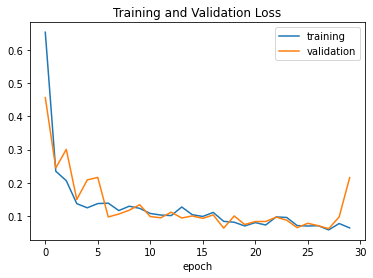

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

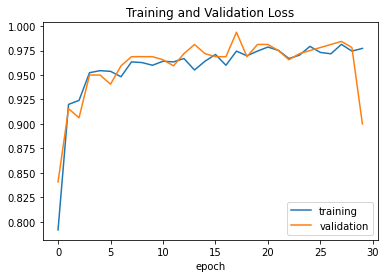

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print('test_acc : {} test_loss : {}'.format(test_acc, test_loss))

16/16 [==============================] - 11s 662ms/step - loss: 0.3033 - accuracy: 0.8740
test_acc : 0.8739669322967529 test_loss : 0.3032902479171753


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  print(path)
  img = image.load_img(path, target_size = (150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes == 0:
    print('Covid19')
  else :
    print('Normal')

Saving C.jpg to C.jpg
Saving C2.jpg to C2.jpg
Saving C3.jpeg to C3.jpeg
Saving N.jpg to N.jpg
Saving N2.jpg to N2.jpg
/content/C.jpg


NameError: ignored

In [ ]:
model.save('model.h5')

In [ ]:
from keras.models import load_model

In [ ]:
mod = load_model('model.h5')
mod.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  print(path)
  img = image.load_img(path, target_size = (150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)
  images = np.vstack([x])
  classes = mod.predict(images, batch_size=10)
  print(fn)
  if classes == 0:
    print('Covid19')
  else :
    print('Normal')

Saving Covid.jpg to Covid.jpg
Saving Covid2.jpg to Covid2.jpg
Saving Covid3.jpeg to Covid3.jpeg
Saving Covid4.jpg to Covid4.jpg
Saving Covid5.jpg to Covid5.jpg
Saving Normal.jpg to Normal.jpg
Saving Normal2.jpg to Normal2.jpg
Saving Normal3.jpg to Normal3.jpg
/content/Covid.jpg
Covid.jpg
Covid19
/content/Covid2.jpg
Covid2.jpg
Covid19
/content/Covid3.jpeg
Covid3.jpeg
Covid19
/content/Covid4.jpg
Covid4.jpg
Covid19
/content/Covid5.jpg
Covid5.jpg
Covid19
/content/Normal.jpg
Normal.jpg
Covid19
/content/Normal2.jpg
Normal2.jpg
Covid19
/content/Normal3.jpg
Normal3.jpg
Normal
